In [3]:
# Combined populations where capped at 100.
import numpy as np                   # for multi-dimensional containers
import pandas as pd       # for DataFrame
import json
import platypus as plat              # multi-objective optimisation framework
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import pygmo as pg

In [28]:
# uncapped
uncap_borda_CON = pd.json_normalize(json.load(open("uncap_borda.json"))["data"])
#uncap_borda

# normal 
borda_CON = pd.json_normalize(json.load(open("../Data/borda.json"))["data"])
borda_COM = pd.json_normalize(json.load(open("../Data/borda-combined.json"))["data"])

In [29]:
uncap_borda_CON

,map-id,source,target,voting-mechanism,child-generation-method,gen0-front,gen0-norm-front,gen0-raw-d-score,gen0-norm-d-score,gen0-sparsity,...,gen5-front,gen5-norm-front,gen5-raw-d-score,gen5-norm-d-score,gen5-sparsity,gen5-raw-winner,gen5-norm-winner,gen5-winner-raw-d-score,gen5-winner-norm-d-score,gen5-time
0,dao-map/ost004d.map,548,3495,borda,weighted_conscious,"[[41, 54.248, 427, 87, 179.5], [60, 72.006, 17...","[[0, 0, 0.961686, 0.314815, 0.112903], [1, 1, ...","[476.174, 351.825, 482.403, 452.625]","[1.01818, 2, 1.00635, 0.933329]",2.074930e+04,...,"[[41, 55.076, 362, 70, 169], [41, 54.248, 437,...","[[0, 0.0466269, 0.632653, 0, 0], [0, 0, 0.8877...","[476.174, 351.825, 482.403, 452.625]","[0.634369, 0.894906, 1.00001, 0.486109, 0.9169...",3600.570,"[41, 55.076, 362, 70, 169]","[0, 0.0466269, 0.632653, 0, 0]",411.363,0.634369,410
1,dao-map/den400d.map,2117,6588,borda,weighted_conscious,"[[28, 32.14, 284, 93, 98], [38, 43.796, 140, 7...","[[0, 0, 0.993103, 1, 0], [1, 1, 0, 0.627451, 1...","[317.374, 214.772, 307.35, 317.374]","[1.40935, 1.8422, 1.00252, 1.40935]",7.854980e+03,...,"[[28, 34.624, 181, 42, 98], [28, 35.452, 166, ...","[[0, 0.198975, 0.257862, 0, 0], [0, 0.2653, 0....","[317.374, 214.772, 307.35, 317.374]","[0.325705, 0.319727, 0.340705, 0.914358, 1, 0....",680.385,"[28, 34.624, 181, 42, 98]","[0, 0.198975, 0.257862, 0, 0]",214.737,0.325705,381
2,dao-map/lak401d.map,43488,10085,borda,weighted_conscious,"[[641, 678.26, 6828, 1480, 2421.5], [783, 965....","[[0, 0, 0.976081, 0.596298, 0.385656], [1, 1, ...","[7452.96, 4453.7, 7457.56, 7338.94]","[1.20708, 2, 1.0623, 1.11076]",6.185310e+06,...,"[[643, 721.66, 5967, 964.5, 2170], [643, 723.3...","[[0.0140845, 0.151272, 0.778059, 0, 0.0453315]...","[7452.96, 4453.7, 7457.56, 7338.94]","[0.794048, 0.924632, 0.779549, 1.11076, 0.5133...",179698.000,"[643, 721.66, 5967, 964.5, 2170]","[0.0140845, 0.151272, 0.778059, 0, 0.0453315]",6494.500,0.794048,5376
3,dao-map/lak303d.map,813,5601,borda,weighted_conscious,"[[304, 357.82, 3182, 685.5, 1386.5], [392, 487...","[[0, 0, 0.990962, 0.490196, 0.275986], [1, 1, ...","[3569.01, 2414.14, 3466.01, 3537.19]","[1.1395, 2, 0.978789, 1.09258]",1.162920e+06,...,"[[307, 377.794, 2263, 460.5, 1282.5], [307, 36...","[[0.0340909, 0.154359, 0.487868, 0, 0.0274791]...","[3569.01, 2414.14, 3466.01, 3537.19]","[0.513575, 0.640659, 0.668875, 0.744908, 0.601...",10734.300,"[307, 377.794, 2263, 460.5, 1282.5]","[0.0340909, 0.154359, 0.487868, 0, 0.0274791]",2686.080,0.513575,4073
4,dao-map/orz203d.map,138,161,borda,weighted_conscious,"[[10, 11.242, 88, 23.5, 31.5], [11, 13.484, 57...","[[0, 7.92309e-16, 0.72093, 0.5, 0.375], [1, 1,...","[97.5443, 74.2231, 108.147, 108.012]","[0.954131, 1.82921, 1.34035, 1.38172]",4.052280e+02,...,"[[10, 11.242, 106, 15, 30], [10, 12.07, 80, 15...","[[0, 0, 1, 0, 0.15], [0, 0.369313, 0.469388, 0...","[97.5443, 74.2231, 108.147, 108.012]","[1.01119, 0.811922, 1.10677, 0.860378, 1.14824...",36.551,"[10, 11.242, 106, 15, 30]","[0, 0, 1, 0, 0.15]",112.194,1.011190,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,dao-map/lak510d.map,6805,5183,borda,weighted_conscious,"[[90, 99.936, 882, 254, 333.5], [110, 138.152,...","[[0, 0, 0.910946, 1, 0.0769231], [1, 1, 0, 0.8...","[985.774, 641.655, 1006.29, 972.809]","[1.35489, 1.9496, 1.00795, 1.19597]",8.509540e+04,...,"[[90, 102.42, 923, 135, 328.5], [90, 104.904, ...","[[0, 0.0664384, 1, 0, 0.0179641], [0, 0.132877...","[985.774, 641.655, 1006.29, 972.809]","[1.00237, 0.540813, 0.509604, 1.26701, 0.51420...",3321.930,"[90, 102.42, 923, 135, 328.5]","[0, 0.0664384, 1, 0, 0.0179641]",998.327,1.002370,1050
152,dao-map/orz901d.map,13494,30864,borda,weighted_conscious,"[[1059, 1164.98, 10934, 2634, 3414.5], [1291, ...","[[0, 0, 0.959053, 0.748918, 0.304364], [1, 1, ...","[11858.7, 7135.15, 11825.9, 11999.3]","[1.25431, 2, 1.02585, 1.22781]",1.533940e+07,...,"[[1064, 1187.79, 10266, 1596, 3070.5], [1064, ...","[[0.0215517, 0.051843

In [31]:
# overall average
def VBEA_SPAR(df):
    sparsity_df = df.filter(["gen0-sparsity","gen1-sparsity", "gen2-sparsity", "gen3-sparsity", "gen4-sparsity", "gen5-sparsity"])
    avg_gen_sparsity = sparsity_df.mean(axis=0)
    return avg_gen_sparsity.tolist()

In [83]:
# front is a list of solutions
def get_hv(front):
    inver = [] 
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
        inver.append(temp_row)

    ref = [0] * len(front[0]) # always use the reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume
    # catch cases where the front is too small to calculate hypervolune
    try:
        h = hv.compute(ref)
    except ValueError:
        h = -1
        print("----------------------", "\n", "No good ref point")
        print(front)

    return h

In [84]:
# gets the hypervolumem for each generatiojn
def VBEA_HV(df):
    fronts_df = df.filter(["gen0-front", "gen1-front", "gen2-front", "gen3-front", "gen4-front", "gen5-front"])
    gen_HV = []
    for index, row in fronts_df.iterrows(): #iterate over rows
        cur = []
        for gen_front in row: #iterate over generations of a row
            cur.append(get_hv(gen_front))
        gen_HV.append(cur)

    HV_df = pd.DataFrame(gen_HV, columns = ["gen0-HV", "gen1-HV", "gen2-HV", "gen3-HV", "gen4-HV", "gen5-HV"])
    return HV_df.mean(axis=0).tolist()

In [85]:
uncap_borda_CON_spar = VBEA_SPAR(uncap_borda_CON)
uncap_borda_CON_hv = VBEA_HV(uncap_borda_CON)

In [86]:
print(uncap_borda_CON_spar)
print(uncap_borda_CON_hv)

[544673.6207916666, 140819.8617794872, 44016.18904358974, 22801.889542307694, 16786.943624999996, 14432.807769871797]
[2402269739485035.0, 2401444000630489.5, 2417500067245409.0, 2428289737340731.5, 2433250370599348.0, 2435655434267563.5]


In [88]:
borda_CON_spar = VBEA_SPAR(borda_CON)
borda_COM_spar = VBEA_SPAR(borda_COM)
borda_CON_hv = VBEA_HV(borda_CON)
borda_COM_hv = VBEA_HV(borda_COM)

---------------------- 
 No good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0]]


In [89]:
print(borda_CON_spar)
print(borda_COM_spar)
print(borda_COM_hv)
print(borda_CON_hv)

[651248.9044433333, 137087.55511036323, 67062.67708435896, 59018.667319384615, 54922.78991302479, 54585.58249410256]
[651248.9044433333, 162274.82594666665, 57357.42367468376, 61353.9032273547, 54046.75202595726, 52502.452510213676]
[1.5871240566442096e+16, 1.5871335472261316e+16, 1.0180582043220206e+16, 6720911657910798.0, 7293563928774324.0, 6812898834648924.0]
[1.5871240566442096e+16, 1.5995509606881116e+16, 1.080425182649405e+16, 7771710609406874.0, 7414536423545838.0, 7598664995194374.0]


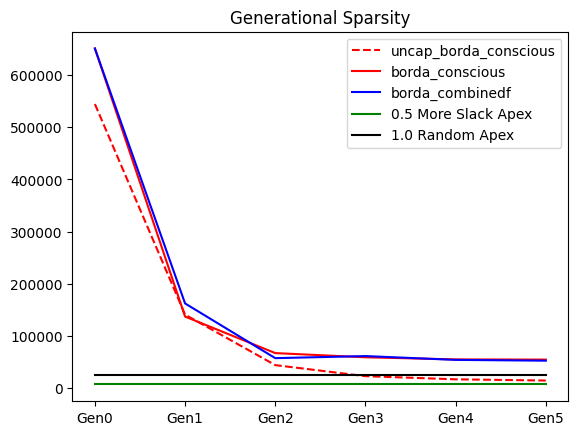

In [34]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_borda_CON_spar
ax.plot(y, "--r", label = "uncap_borda_conscious")

y = borda_CON_spar
ax.plot(y, "-r", label = "borda_conscious")

y = borda_COM_spar
ax.plot(y, "-b", label = "borda_combinedf")

y = [6873.903355] * 6
ax.plot(y, '-g', label='0.5 More Slack Apex')

y = [24259.458094] * 6
ax.plot(y, '-k', label='1.0 Random Apex')

plt.title("Generational Sparsity")
plt.legend()
plt.show()

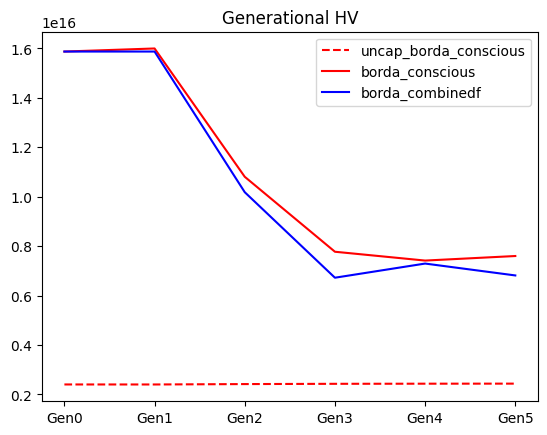

In [91]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_borda_CON_hv
ax.plot(y, "--r", label = "uncap_borda_conscious")

y = borda_CON_hv
ax.plot(y, "-r", label = "borda_conscious")

y = borda_COM_hv
ax.plot(y, "-b", label = "borda_combinedf")

y = [] * 6
ax.plot(y, '-g', label='0.5 More Slack Apex')

y = [24259.458094] * 6
ax.plot(y, '-k', label='1.0 Random Apex')

plt.title("Generational HV")
plt.legend()
plt.show()

In [54]:
temp = uncap_borda_CON.filter(["gen0-front", "gen1-front", "gen2-front", "gen3-front", "gen4-front", "gen5-front"])

In [58]:
temp

,gen0-front,gen1-front,gen2-front,gen3-front,gen4-front,gen5-front
0,"[[41, 54.248, 427, 87, 179.5], [60, 72.006, 17...","[[60, 72.006, 176, 124, 262], [41, 54.248, 437...","[[41, 55.076, 362, 70, 169], [41, 54.248, 437,...","[[41, 55.076, 362, 70, 169], [41, 54.248, 437,...","[[41, 55.076, 362, 70, 169], [41, 54.248, 437,...","[[41, 55.076, 362, 70, 169], [41, 54.248, 437,..."
1,"[[28, 32.14, 284, 93, 98], [38, 43.796, 140, 7...","[[28, 32.968, 285, 42, 98], [28, 32.14, 284, 9...","[[28, 32.968, 285, 42, 98], [28, 32.14, 299, 4...","[[28, 34.624, 181, 42, 98], [28, 32.968, 285, ...","[[28, 34.624, 181, 42, 98], [28, 35.452, 166, ...","[[28, 34.624, 181, 42, 98], [28, 35.452, 166, ..."
2,"[[641, 678.26, 6828, 1480, 2421.5], [783, 965....","[[642, 706.17, 6809, 1422, 2136.5], [641, 678....","[[642, 706.17, 6809, 1422, 2136.5], [643, 721....","[[643, 721.66, 5967, 964.5, 2170], [643, 723.3...","[[643, 721.66, 5967, 964.5, 2170], [643, 723.3...","[[643, 721.66, 5967, 964.5, 2170], [643, 723.3..."
3,"[[304, 357.82, 3182, 685.5, 1386.5], [392, 487...","[[392, 487.22, 1318, 919.5, 1689.5], [305, 363...","[[305, 363.374, 3199, 661.5, 1271], [307, 367....","[[305, 364.202, 3179, 474.5, 1276.5], [307, 37...","[[305, 366.686, 2605, 474.5, 1276.5], [307, 37...","[[307, 377.794, 2263, 460.5, 1282.5], [307, 36..."
4,"[[10, 11.242, 88, 23.5, 31.5], [11, 13.484, 57...","[[10, 11.242, 88, 23.5, 31.5], [10, 11.242, 98...","[[11, 13.484, 59, 16.5, 38.5], [10, 11.242, 88...","[[10, 11.242, 106, 15, 30], [10, 12.07, 80, 15...","[[10, 11.242, 106, 15, 30], [10, 12.07, 80, 15...","[[10, 11.242, 106, 15, 30], [10, 12.07, 80, 15..."
...,...,...,...,...,...,...
151,"[[90, 99.936, 882, 254, 333.5], [110, 138.152,...","[[90, 99.936, 877, 228.5, 327], [90, 104.076, ...","[[90, 99.936, 877, 228.5, 327], [90, 102.42, 9...","[[90, 99.936, 877, 228.5, 327], [90, 102.42, 9...","[[90, 102.42, 923, 135, 328.5], [90, 104.904, ...","[[90, 102.42, 923, 135, 328.5], [90, 104.904, ..."
152,"[[1059, 1164.98, 10934, 2634, 3414.5], [1291, ...","[[1059, 1164.98, 10934, 2634, 3414.5], [1291, ...","[[1062, 1191.58, 8874, 1652.5, 3063.5], [1064,...","[[1064, 1187.79, 10266, 1596, 3070.5], [1062, ...","[[1062, 1191.58, 8874, 1652.5, 3063.5], [1064,...","[[1064, 1187.79, 10266, 1596, 3070.5], [1064, ..."
153,"[[96, 115.872, 966, 195, 449.5], [124, 155.464...","[[96, 115.872, 966, 195, 449.5], [96, 118.356,...","[[96, 119.184, 741, 144, 414.5], [124, 155.464...","[[96, 118.356, 913, 144, 410], [96, 119.184, 7...","[[96, 118.356, 913, 144, 410], [96, 119.184, 7...","[[96, 118.356, 913, 144, 410], [96, 119.184, 7..."
154,"[[233, 254.114, 2449, 545, 986], [293, 367.934...","[[235, 256.942, 2437, 522.5, 867], [233, 254.1...","[[235, 256.942, 2437, 522.5, 867], [235, 264.3...","[[235, 256.942, 2437, 522.5, 867], [235, 264.3...","[[235, 256.942, 2437, 522.5, 867], [235, 264.3...","[[235, 264.394, 2131, 369.5, 883.5], [236, 264..."


In [68]:
avg_front_size = []
for gen in temp:
    avg_gen_size = []
    for front in temp[gen].to_list():
        avg_gen_size.append(len(front))
    avg_front_size.append(np.average(avg_gen_size).tofloat)

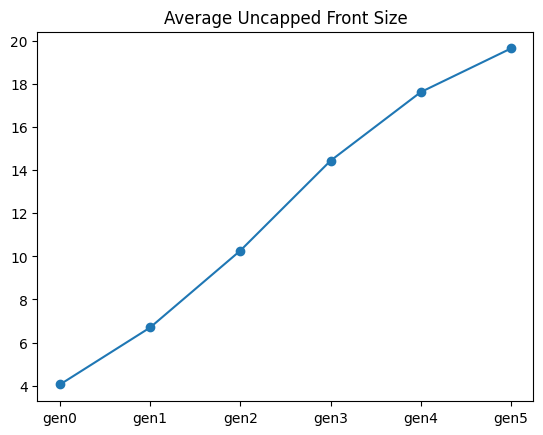

In [82]:
fig, ax = plt.subplots()

x = [0,1,2,3,4,5]
xticks = ["gen0", "gen1", "gen2", "gen3", "gen4", "gen5"]
plt.xticks(x, xticks)

y = avg_front_size
plt.plot(y, "-o", label = "borda")

plt.title("Average Uncapped Front Size")
plt.show()